In [172]:
import matplotlib.pyplot as plt
import numpy as np
import random
from timeit import default_timer as timer
import pandas as pd

In [173]:
#Создаем векторы с координатами в виде массива.
x10 = np.array(random.sample(range(1000), 10))
y10 = np.array(random.sample(range(1000), 10))

x50 = np.array(random.sample(range(1000), 50))
y50 = np.array(random.sample(range(1000), 50))

x100 = np.array(random.sample(range(1000), 100))
y100 = np.array(random.sample(range(1000), 100))

In [174]:
#Наивное скалярное произведение.
def naiveScalarMult(x, y):
    assert x.ndim == 1 and y.ndim == 1
    assert x.size == y.size
    result = 0
    for i in range(x.size):
        result += x[i]*y[i]
    return result

In [175]:
#NumPy произведение.
def numPyScalarMult(x, y):
    assert x.ndim == 1 and y.ndim == 1
    assert x.size == y.size

    return np.dot(x, y)

In [176]:
#Функция возвращает время выполнения функции с параметрами x, y.
def timeOf(function, x, y):
    times = []
    for iter in range(10000):
        t = timer()
        function(x, y)
        delta = timer() - t
        times.append(delta)
    return sum(times)/len(times)

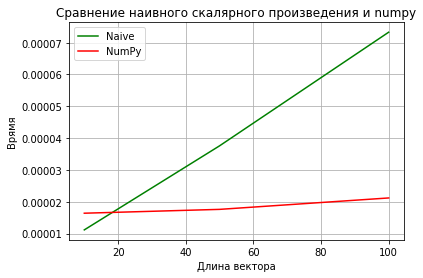

In [177]:
#Значения оси ординат в соответствии со временем выполнения функций проиизведения.
timesNaive = np.array([timeOf(naiveScalarMult, x10, y10), timeOf(naiveScalarMult, x50, y50), timeOf(naiveScalarMult, x100, y100)])
timesNumPy = np.array([timeOf(numPyScalarMult, x10, y10), timeOf(numPyScalarMult, x50, y50), timeOf(numPyScalarMult, x100, y100)])

#Значения оси абцисс в соответствии с длинной векторов.
xRange = [x10.size, x50.size, x100.size]

#Построение графика.
plt.title("Сравнение наивного скалярного произведения и numpy")
plt.xlabel("Длина вектора")
plt.ylabel("Врямя")

plt.grid()
plt.plot(xRange, timesNaive, '-', color = 'g', label = "Naive")
plt.plot(xRange, timesNumPy, '-', color = 'r', label = "NumPy")

plt.legend(loc = "best")

In [178]:
#Сохраняем результаты в DataFrame.
results = pd.DataFrame({
    "Length": xRange,
    "Naive time": timesNaive,
    "NumPy time": timesNumPy
})
print(results)

   Length  Naive time  NumPy time
0      10    0.000011    0.000016
1      50    0.000038    0.000018
2     100    0.000073    0.000021
